In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt'+str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]

data = pd.DataFrame(columns = [*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  174  208  202  181  193  469  486  524  485  464
gene2  588  565  529  568  570  111   96   81   89  108
gene3  379  366  401  385  366  891  961  902  975  903
gene4  491  458  512  494  459  281  275  322  316  252
gene5  662  662  614  617  631  930  911  939  906  889
(100, 10)


In [6]:
scaled_data = preprocessing.scale(data.T)

In [7]:
StandardScalar

array([[-1.11198855,  1.10027213, -0.99693317,  1.05329141, -0.81350531,
        -1.05153994,  0.9307756 , -1.25103496, -0.99038423, -1.00911509,
         1.04424112,  0.98668525,  0.90483432,  1.03709712,  0.91713616,
        -0.94524877,  0.99398736,  0.463009  ,  0.97342274,  1.05756381,
        -1.12014692,  1.07137951, -1.27987299, -1.11479501,  1.00639117,
        -0.92982307,  1.07040905, -0.98702563,  0.89239008,  0.39045224,
        -0.99595876, -1.01392933, -0.95645684, -0.86559205,  0.78568057,
        -1.05449091,  0.95757106, -1.01903322, -0.95596873,  2.00286781,
        -1.86364934,  1.18549304, -1.13157487, -0.9666161 ,  1.13824501,
         0.89881033, -1.0043377 , -0.76381241,  0.59330878, -0.9957779 ,
        -1.06421163,  1.08471444,  0.93468099,  1.10895619,  0.70207469,
        -0.84303922, -0.80562879, -1.01682551, -0.988062  , -0.60321157,
        -1.01208804,  1.54124857, -1.02689245,  1.21351464,  0.99518883,
        -1.00687032, -1.00301357, -0.97753477,  0.9

In [8]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [9]:
pca_data = pca.transform(scaled_data)

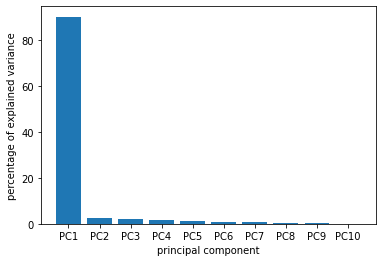

In [11]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal component')
plt.show()

In [12]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

In [13]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.808744,1.293999,-1.674085,-0.976846,0.510811,-1.718764,-0.414071,-0.565373,-0.443013,3.683636e-15
wt2,-9.584611,-0.184629,-0.242205,2.084947,2.231953,0.747008,0.242787,0.312152,-0.171706,8.102442e-15
wt3,-9.751271,0.782357,0.427445,-1.388995,-0.871411,1.958918,-0.447006,-0.419459,-0.385199,3.232461e-15
wt4,-9.208070,-0.270776,1.043973,0.180069,-0.443527,-0.354818,0.609872,-0.800748,1.215383,2.987715e-15
wt5,-9.125957,-1.749830,0.409691,0.192697,-1.516514,-0.641506,0.019353,1.476912,-0.190568,3.891158e-15
ko1,9.275638,2.737149,1.460842,0.322382,-0.412280,-0.277590,1.356017,0.099287,-0.475830,-4.554582e-15
ko2,9.449236,2.275203,-1.506167,-0.020719,-0.003169,0.341985,-0.851366,0.866039,0.774010,-2.906390e-15
ko3,10.020696,-1.446980,-1.445336,1.989629,-1.349375,0.113379,-0.289722,-0.904259,-0.277985,-5.675082e-15
ko4,9.282846,-1.059698,2.847356,-0.378857,0.947304,-0.489070,-1.215771,-0.166378,-0.098301,-3.981992e-15
ko5,9.450236,-2.376796,-1.321511,-2.004307,0.906208,0.320459,0.989907,0.101827,0.053209,-2.473838e-15


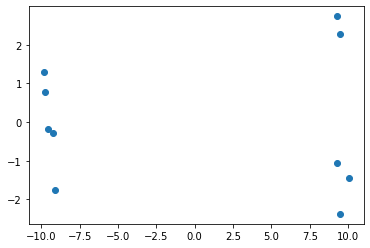

In [15]:
plt.scatter(pca_df.PC1, pca_df.PC2)

# PCA

In [1]:
# load data 
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# we compute the covariate matrix and the eigenvector and eigenvalues for the covariate matrix.

import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(f'eigenvalues is {eigen_vals}')

eigenvalues is [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


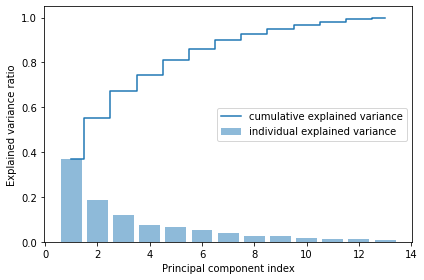

In [4]:
# we calculate the biggest eigenvalues 
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align = 'center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc='best')
plt.tight_layout()
plt.show()



In [5]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k : k[0], reverse=True)

In [6]:
eigen_pairs

[(4.842745315655893,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352255,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203515,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977364,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.841661610457841,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114, 

In [7]:
# we make 투영matrix
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:,np.newaxis]))
# np.newaxis is a very convenient method to use
print(w)

[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [11]:
X_train_pca = X_train_std.dot(w)

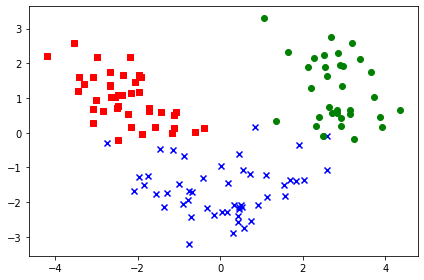

In [15]:
colors = ['r','b','g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],
                c=c, label=l, marker=m)
plt.tight_layout()
plt.show()